In [4]:
print("all ok")

all ok


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [3]:
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [5]:
if not OPENAI_API_KEY:
    raise ValueError("OPENAI_API_KEY is missing in your .env")
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [6]:
from langchain_openai import ChatOpenAI

In [7]:
chat_llm = ChatOpenAI(model="gpt-4o-mini")

In [8]:
chat_llm.invoke("Hello, How are you?").content

"Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?"

In [9]:
from typing_extensions import TypedDict, Annotated
import operator

In [10]:
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage

In [11]:
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

In [13]:
{
    "messages": [HumanMessage(content="Hi, this is Vinod. Say hello in detail.")]
}

{'messages': [HumanMessage(content='Hi, this is Vinod. Say hello in detail.', additional_kwargs={}, response_metadata={})]}

### **llm_call** function reads the conversation so far, asks the LLM for the next reply, and returns that reply in a structure that your graph/workflow can merge back into the running message history.

In [ ]:
def llm_call(state: GraphState) -> dict: #Defines a function that takes the current graph/conversation state and returns a dict.
    """Call the LLM using conversation messages and append AI response.""" #Docstring: describes intention
    response = chat_llm.invoke(state["messages"])  # AIMessage
    return {
        "messages": [response]
    }

In [15]:
def token_counter(state: GraphState) -> dict: #Defines a function that takes the current graph/conversation state and returns a dict.
    """Count tokens (simple word count) in the last AI message."""
    last_msg = state["messages"][-1]
    text = last_msg.content
    token_number = len(text.split())
    summary = f"Total token number in the generated answer (word count) is {token_number}"
    return {
        "messages": [AIMessage(content=summary)]
    }

In [16]:
from langgraph.graph import StateGraph

In [17]:
builder = StateGraph(GraphState)

In [18]:
builder.add_node("llm_call", llm_call)
builder.add_node("token_counter", token_counter)

In [19]:
builder.set_entry_point("llm_call")
builder.add_edge("llm_call", "token_counter")
builder.set_finish_point("token_counter")

In [20]:
app = builder.compile()

In [21]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

In [22]:

from IPython.display import Image, display

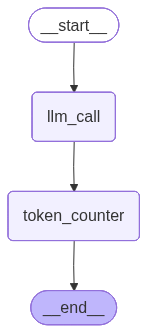

In [23]:
display(Image(app.get_graph().draw_mermaid_png()))